# Importing Libraries

In [ ]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, Model

#Data Generator Function
- Generating data from range -20 to 20

In [ ]:
def generate_data(num_of_data):
    X = np.random.randint(-20, 20, size=num_of_data, dtype=int)
    Y = 5*X**3 - 68*X**2 - 7*X + 1
    return X, Y

#Defining the DNN Model

In [ ]:
def DNN_Model():
	inputs = layers.Input(shape=(1,))
	x = layers.Dense(32, activation='relu')(inputs)
	x = layers.Dense(64, activation='relu')(x)
	x = layers.Dense(128, activation='relu')(x)
	outputs = layers.Dense(1, activation='tanh')(x)

	model = Model(inputs=inputs, outputs=outputs)

	return model

In [ ]:
model = DNN_Model()
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

#Normalizing Data from -1 to +1

In [ ]:
data_x, data_y = generate_data(5000)

x_min = np.min(data_x)
x_max = np.max(data_x)
y_min = np.min(data_y)
y_max = np.max(data_y)

data_x = 2 * ((data_x - x_min) / (x_max - x_min)) - 1
data_y = 2 * ((data_y - y_min) / (y_max - y_min)) - 1

train_x = data_x[:int(len(data_x)*.9)]
train_y = data_y[:int(len(data_y)*.9)]

val_x = data_x[int(len(data_x)*.9):int(len(data_x)*.95)]
val_y = data_y[int(len(data_y)*.9):int(len(data_y)*.95)]

test_x = data_x[int(len(data_x)*.95):]
test_y = data_y[int(len(data_y)*.95):]

#Compiling and Training the Model

In [ ]:
model = DNN_Model()
model.summary()

model.compile(optimizer=Adam(learning_rate=1e-4), loss="mean_squared_error", metrics=[tf.keras.metrics.R2Score()])
history = model.fit(train_x, train_y, epochs=50, validation_data=(val_x, val_y))

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4774 - r2_score: -1.0809 - val_loss: 0.2191 - val_r2_score: 0.0760
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1548 - r2_score: 0.2904 - val_loss: 0.0772 - val_r2_score: 0.6746
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0554 - r2_score: 0.7472 - val_loss: 0.0264 - val_r2_score: 0.8889
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0196 - r2_score: 0.9155 - val_loss: 0.0106 - val_r2_score: 0.9555
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0089 - r2_score: 0.9617 - val_loss: 0.0063 - val_r2_score: 0.9733
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061 - r2_score: 0.9738 - val_loss: 0.0051 - val_r2_score: 0.9787
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0054 - r2_score: 0.9770 - val_loss: 0.0049 - val_r2_score: 0.9792
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0046 - r2_score: 0.9789 - val_loss: 0.004

#Getting the Predicted Results on Test Data

In [ ]:
pred_y = model.predict(test_x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


#Denormalizing the Test Data and Predicted Output

In [ ]:
test_dx = ((test_x + 1) * (x_max - x_min) / 2) + x_min
test_dy = ((test_y + 1) * (y_max - y_min) / 2) + y_min
pred_dy = ((pred_y + 1) * (y_max - y_min) / 2) + y_min

#Used the Test Data for prediction

In [ ]:
print('Actual X Value: ', test_dx[0])
print('Actual Y Value: ', test_dy[0])
print('Predicted Y Value: ', pred_dy[0])

Actual X Value:  3.0
Actual Y Value:  -497.0
Predicted Y Value:  [-383.5045495]


#Plotting the training accuracy vs validation accuracy and training error vs validation error curves and also plotting the prediction accuracy vs true levels of the Test Data.

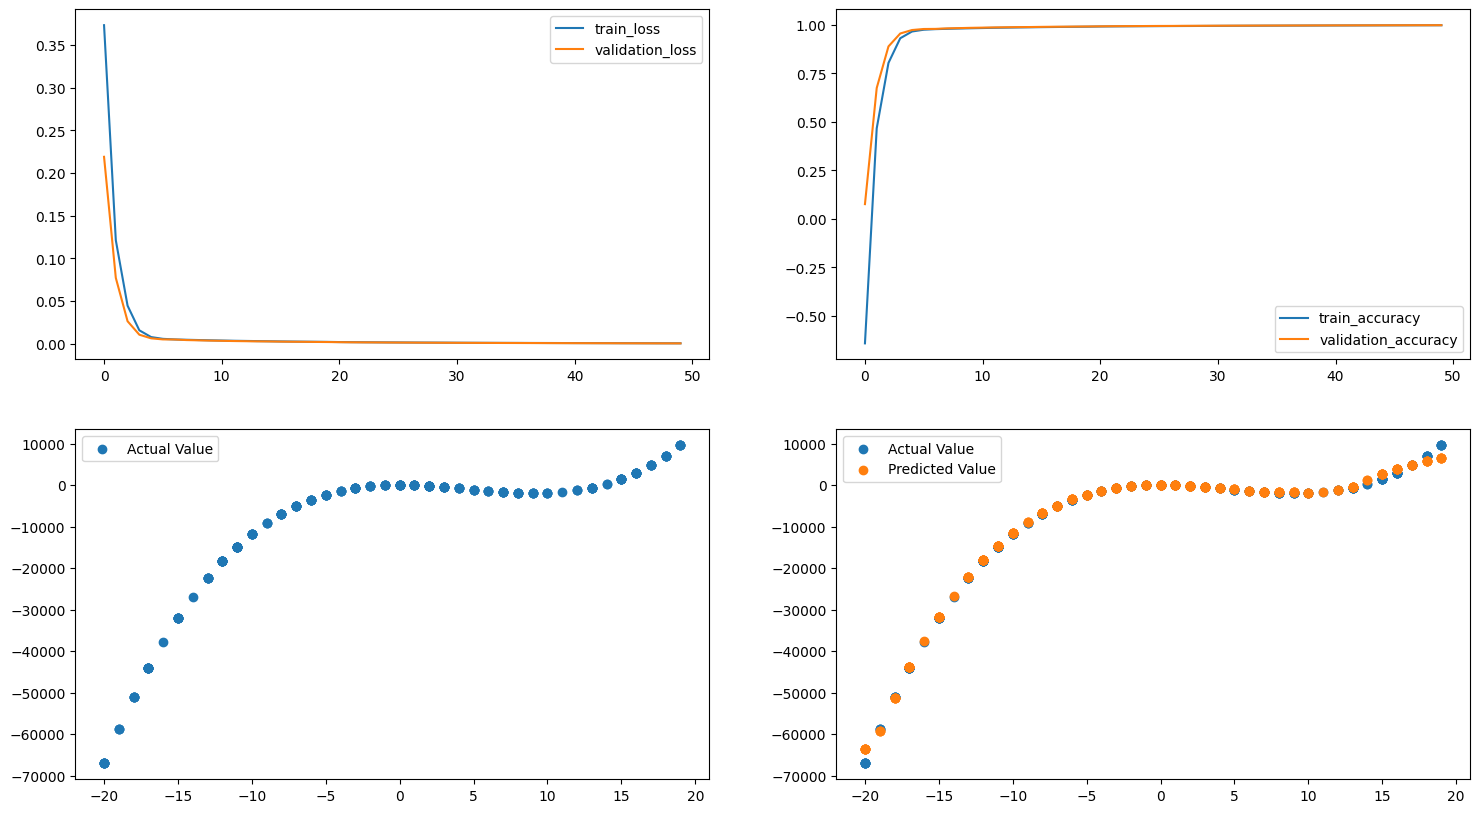

In [ ]:
performance_dict = history.history
plt.figure(figsize = (18, 10))
plt.subplot(2,2,1)
plt.plot(performance_dict['loss'])
plt.plot(performance_dict['val_loss'])
plt.legend(['train_loss', 'validation_loss'])

plt.subplot(2,2,2)
plt.plot(performance_dict['r2_score'])
plt.plot(performance_dict['val_r2_score'])
plt.legend(['train_accuracy', 'validation_accuracy'])

plt.subplot(2,2,3)
plt.scatter(test_dx, test_dy)
plt.legend(['Actual Value'])

plt.subplot(2,2,4)
plt.scatter(test_dx, test_dy)
plt.scatter(test_dx, pred_dy)
plt.legend(['Actual Value', 'Predicted Value'])

plt.show()